In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy._typing import NDArray

from vcsvgenie.read import read_vcsv
from vcsvgenie.transient_waveform import TransientResultSpecification, TransientResult
from vcsvgenie.waveform import construct_waveforms

from pathlib import Path
from typing import List, Tuple, Union

# Variant Analysis

This notebook analyzes the transient simulation results of a design space exploration (DSE) on a simple combinational logic block (CLB). This CLB is tested within a delay testbench where all I/O ports are buffered by a series of two inverters each. The CLB consists of  three AND/OR-type gates in series (ergo, six CMOS stages). The DSE explores substitution of standard voltage threshold transistors with low-voltage threshold transistors. Each variant tests a unique combination of LVT and SVT CMOS stages; ergo, it consists of 64 variants ($2^6$).

![Circuit Photo](circuit1.png)


Each variant will have its own `TransientResultSpecification`. The I/O nets of interest were procedurally-named, so the corresponding specs will be procedurally-generated.

In [37]:
VCSV_FILE = Path("exhaustive_hw4.vcsv")
dataframe, titles = read_vcsv(VCSV_FILE)
waveforms = construct_waveforms(dataframe, titles)

In [38]:
specifications: List[TransientResultSpecification | None] = [None] * 64
results: List[TransientResult | None] = [None] * 64

a_propagations: List[List[float] | None] = [None] * 64
b_propagations: List[List[float] | None] = [None] * 64
c_propagations: List[List[float] | None] = [None] * 64
d_propagations: List[List[float] | None] = [None] * 64

avg_a_propagations = np.zeros(64, dtype=np.float64)
avg_b_propagations = np.zeros(64, dtype=np.float64)
avg_c_propagations = np.zeros(64, dtype=np.float64)
avg_d_propagations = np.zeros(64, dtype=np.float64)

stdev_a_propagations = np.zeros(64, dtype=np.float64)
stdev_b_propagations = np.zeros(64, dtype=np.float64)
stdev_c_propagations = np.zeros(64, dtype=np.float64)
stdev_d_propagations = np.zeros(64, dtype=np.float64)

max_a_propagations = np.zeros(64, dtype=np.float64)
max_b_propagations = np.zeros(64, dtype=np.float64)
max_c_propagations = np.zeros(64, dtype=np.float64)
max_d_propagations = np.zeros(64, dtype=np.float64)


for i in range(64):
    specifications[i] = TransientResultSpecification(
        inputs = [
            "/a",
            "/b",
            "/c",
            "/d",
            f"/a_v<{i + 1}>",
            f"/b_v<{i + 1}>",
            f"/c_v<{i + 1}>",
            f"/d_v<{i + 1}>",
        ],
        outputs=[
            f"/out_v<{i + 1}>"
        ],
        logic_threshold=0.5,
        clock_period=1e-9
    )
    results[i] = specifications[i].interpret(waveforms)
    results[i].find_transitions()
    results[i].find_propagations()
    
    a_propagations[i]: List[float] = []
    b_propagations[i]: List[float] = []
    c_propagations[i]: List[float] = []
    d_propagations[i]: List[float] = []
    for propagation in results[i].propagations:
        if "/a_v" in propagation.source:
            a_propagations[i].append(propagation.delay)
        elif "/b_v" in propagation.source:
            b_propagations[i].append(propagation.delay)
        elif "/c_v" in propagation.source:
            c_propagations[i].append(propagation.delay)
        elif "/d_v" in propagation.source:
            d_propagations[i].append(propagation.delay)
    
    avg_a_propagations[i] = np.mean(a_propagations[i])
    stdev_a_propagations[i] = np.std(a_propagations[i])
    max_a_propagations[i] = np.max(a_propagations[i])
    
    avg_b_propagations[i] = np.mean(b_propagations[i])
    stdev_b_propagations[i] = np.std(b_propagations[i])
    max_b_propagations[i] = np.max(b_propagations[i])
    
    avg_c_propagations[i] = np.mean(c_propagations[i])
    stdev_c_propagations[i] = np.std(c_propagations[i])
    max_c_propagations[i] = np.max(c_propagations[i])
    
    avg_d_propagations[i] = np.mean(d_propagations[i])
    stdev_d_propagations[i] = np.std(d_propagations[i])
    max_d_propagations[i] = np.max(d_propagations[i])


In [39]:
nor_svt_indices: List[int] = list()
nor_lvt_indices: List[int] = list()
norinv_svt_indices: List[int] = list()
norinv_lvt_indices: List[int] = list()
nand1_svt_indices: List[int] = list()
nand1_lvt_indices: List[int] = list()
nand1inv_svt_indices: List[int] = list()
nand1inv_lvt_indices: List[int] = list()
nand2_svt_indices: List[int] = list()
nand2_lvt_indices: List[int] = list()
nand2inv_svt_indices: List[int] = list()
nand2inv_lvt_indices: List[int] = list()

nor_lvt_a_measurements: List[float] = list()
nor_svt_a_measurements: List[float] = list()
norinv_lvt_a_measurements: List[float] = list()
norinv_svt_a_measurements: List[float] = list()
nand1_lvt_a_measurements: List[float] = list()
nand1_svt_a_measurements: List[float] = list()
nand1inv_lvt_a_measurements: List[float] = list()
nand1inv_svt_a_measurements: List[float] = list()
nand2_lvt_a_measurements: List[float] = list()
nand2_svt_a_measurements: List[float] = list()
nand2inv_lvt_a_measurements: List[float] = list()
nand2inv_svt_a_measurements: List[float] = list()

nor_lvt_b_measurements: List[float] = list()
nor_svt_b_measurements: List[float] = list()
norinv_lvt_b_measurements: List[float] = list()
norinv_svt_b_measurements: List[float] = list()
nand1_lvt_b_measurements: List[float] = list()
nand1_svt_b_measurements: List[float] = list()
nand1inv_lvt_b_measurements: List[float] = list()
nand1inv_svt_b_measurements: List[float] = list()
nand2_lvt_b_measurements: List[float] = list()
nand2_svt_b_measurements: List[float] = list()
nand2inv_lvt_b_measurements: List[float] = list()
nand2inv_svt_b_measurements: List[float] = list()

nor_lvt_c_measurements: List[float] = list()
nor_svt_c_measurements: List[float] = list()
norinv_lvt_c_measurements: List[float] = list()
norinv_svt_c_measurements: List[float] = list()
nand1_lvt_c_measurements: List[float] = list()
nand1_svt_c_measurements: List[float] = list()
nand1inv_lvt_c_measurements: List[float] = list()
nand1inv_svt_c_measurements: List[float] = list()
nand2_lvt_c_measurements: List[float] = list()
nand2_svt_c_measurements: List[float] = list()
nand2inv_lvt_c_measurements: List[float] = list()
nand2inv_svt_c_measurements: List[float] = list()

nor_lvt_d_measurements: List[float] = list()
nor_svt_d_measurements: List[float] = list()
norinv_lvt_d_measurements: List[float] = list()
norinv_svt_d_measurements: List[float] = list()
nand1_lvt_d_measurements: List[float] = list()
nand1_svt_d_measurements: List[float] = list()
nand1inv_lvt_d_measurements: List[float] = list()
nand1inv_svt_d_measurements: List[float] = list()
nand2_lvt_d_measurements: List[float] = list()
nand2_svt_d_measurements: List[float] = list()
nand2inv_lvt_d_measurements: List[float] = list()
nand2inv_svt_d_measurements: List[float] = list()

for i in range(64):
    is_nor_lvt = i & 32
    is_norinv_lvt = i & 16
    is_nand1_lvt = i & 8
    is_nand1inv_lvt = i & 4
    is_nand2_lvt = i & 2
    is_nand2inv_lvt = i & 1
    if is_nor_lvt:
        nor_lvt_indices.append(i)
        nor_lvt_a_measurements.extend(a_propagations[i])
        nor_lvt_b_measurements.extend(b_propagations[i])
        nor_lvt_c_measurements.extend(c_propagations[i])
        nor_lvt_d_measurements.extend(d_propagations[i])
    else:
        nor_svt_indices.append(i)
        nor_svt_a_measurements.extend(a_propagations[i])
        nor_svt_b_measurements.extend(b_propagations[i])
        nor_svt_c_measurements.extend(c_propagations[i])
        nor_svt_d_measurements.extend(d_propagations[i])
    
    if is_norinv_lvt:
        norinv_lvt_indices.append(i)
        norinv_lvt_a_measurements.extend(a_propagations[i])
        norinv_lvt_b_measurements.extend(b_propagations[i])
        norinv_lvt_c_measurements.extend(c_propagations[i])
        norinv_lvt_d_measurements.extend(d_propagations[i])
    else:
        norinv_svt_indices.append(i)
        norinv_svt_a_measurements.extend(a_propagations[i])
        norinv_svt_b_measurements.extend(b_propagations[i])
        norinv_svt_c_measurements.extend(c_propagations[i])
        norinv_svt_d_measurements.extend(d_propagations[i])
    
    if is_nand1_lvt:
        nand1_lvt_indices.append(i)
        nand1_lvt_a_measurements.extend(a_propagations[i])
        nand1_lvt_b_measurements.extend(b_propagations[i])
        nand1_lvt_c_measurements.extend(c_propagations[i])
        nand1_lvt_d_measurements.extend(d_propagations[i])
    else:
        nand1_svt_indices.append(i)
        nand1_svt_a_measurements.extend(a_propagations[i])
        nand1_svt_b_measurements.extend(b_propagations[i])
        nand1_svt_c_measurements.extend(c_propagations[i])
        nand1_svt_d_measurements.extend(d_propagations[i])
    
    if is_nand1inv_lvt:
        nand1inv_lvt_indices.append(i)
        nand1inv_lvt_a_measurements.extend(a_propagations[i])
        nand1inv_lvt_b_measurements.extend(b_propagations[i])
        nand1inv_lvt_c_measurements.extend(c_propagations[i])
        nand1inv_lvt_d_measurements.extend(d_propagations[i])
    else:
        nand1inv_svt_indices.append(i)
        nand1inv_svt_a_measurements.extend(a_propagations[i])
        nand1inv_svt_b_measurements.extend(b_propagations[i])
        nand1inv_svt_c_measurements.extend(c_propagations[i])
        nand1inv_svt_d_measurements.extend(d_propagations[i])
    
    if is_nand2_lvt:
        nand2_lvt_indices.append(i)
        nand2_lvt_a_measurements.extend(a_propagations[i])
        nand2_lvt_b_measurements.extend(b_propagations[i])
        nand2_lvt_c_measurements.extend(c_propagations[i])
        nand2_lvt_d_measurements.extend(d_propagations[i])
    else:
        nand2_svt_indices.append(i)
        nand2_svt_a_measurements.extend(a_propagations[i])
        nand2_svt_b_measurements.extend(b_propagations[i])
        nand2_svt_c_measurements.extend(c_propagations[i])
        nand2_svt_d_measurements.extend(d_propagations[i])
    
    if is_nand2inv_lvt:
        nand2inv_lvt_indices.append(i)
        nand2inv_lvt_a_measurements.extend(a_propagations[i])
        nand2inv_lvt_b_measurements.extend(b_propagations[i])
        nand2inv_lvt_c_measurements.extend(c_propagations[i])
        nand2inv_lvt_d_measurements.extend(d_propagations[i])
    else:
        nand2inv_svt_indices.append(i)
        nand2inv_svt_a_measurements.extend(a_propagations[i])
        nand2inv_svt_b_measurements.extend(b_propagations[i])
        nand2inv_svt_c_measurements.extend(c_propagations[i])
        nand2inv_svt_d_measurements.extend(d_propagations[i])


In [40]:
avg_nor_lvt_a = np.mean(nor_lvt_a_measurements)
avg_nor_lvt_b = np.mean(nor_lvt_a_measurements)
avg_nor_lvt_c = np.mean(nor_lvt_b_measurements)
avg_nor_lvt_d = np.mean(nor_lvt_d_measurements)
avg_norinv_lvt_a = np.mean(nand1_lvt_a_measurements)
avg_norinv_lvt_b = np.mean(nand1_lvt_b_measurements)
avg_norinv_lvt_c = np.mean(nand1_lvt_c_measurements)
avg_norinv_lvt_d = np.mean(nand1_lvt_d_measurements)
avg_nand1_lvt_a = np.mean(nand1_lvt_a_measurements)
avg_nand1_lvt_b = np.mean(nand1_lvt_b_measurements)
avg_nand1_lvt_c = np.mean(nand1_lvt_c_measurements)
avg_nand1_lvt_d = np.mean(nand1_lvt_d_measurements)
avg_nand1inv_lvt_a = np.mean(nand1inv_lvt_a_measurements)
avg_nand1inv_lvt_b = np.mean(nand1inv_lvt_b_measurements)
avg_nand1inv_lvt_c = np.mean(nand1inv_lvt_c_measurements)
avg_nand1inv_lvt_d = np.mean(nand1inv_lvt_d_measurements)
avg_nand2_lvt_a = np.mean(nand2_lvt_a_measurements)
avg_nand2_lvt_b = np.mean(nand2_lvt_b_measurements)
avg_nand2_lvt_c = np.mean(nand2_lvt_c_measurements)
avg_nand2_lvt_d = np.mean(nand2_lvt_d_measurements)
avg_nand2inv_lvt_a = np.mean(nand2inv_lvt_a_measurements)
avg_nand2inv_lvt_b = np.mean(nand2inv_lvt_b_measurements)
avg_nand2inv_lvt_c = np.mean(nand2inv_lvt_c_measurements)
avg_nand2inv_lvt_d = np.mean(nand2inv_lvt_d_measurements)

avg_nor_svt_a = np.mean(nor_svt_a_measurements)
avg_nor_svt_b = np.mean(nor_svt_a_measurements)
avg_nor_svt_c = np.mean(nor_svt_b_measurements)
avg_nor_svt_d = np.mean(nor_svt_d_measurements)
avg_norinv_svt_a = np.mean(nand1_svt_a_measurements)
avg_norinv_svt_b = np.mean(nand1_svt_b_measurements)
avg_norinv_svt_c = np.mean(nand1_svt_c_measurements)
avg_norinv_svt_d = np.mean(nand1_svt_d_measurements)
avg_nand1_svt_a = np.mean(nand1_svt_a_measurements)
avg_nand1_svt_b = np.mean(nand1_svt_b_measurements)
avg_nand1_svt_c = np.mean(nand1_svt_c_measurements)
avg_nand1_svt_d = np.mean(nand1_svt_d_measurements)
avg_nand1inv_svt_a = np.mean(nand1inv_svt_a_measurements)
avg_nand1inv_svt_b = np.mean(nand1inv_svt_b_measurements)
avg_nand1inv_svt_c = np.mean(nand1inv_svt_c_measurements)
avg_nand1inv_svt_d = np.mean(nand1inv_svt_d_measurements)
avg_nand2_svt_a = np.mean(nand2_svt_a_measurements)
avg_nand2_svt_b = np.mean(nand2_svt_b_measurements)
avg_nand2_svt_c = np.mean(nand2_svt_c_measurements)
avg_nand2_svt_d = np.mean(nand2_svt_d_measurements)
avg_nand2inv_svt_a = np.mean(nand2inv_svt_a_measurements)
avg_nand2inv_svt_b = np.mean(nand2inv_svt_b_measurements)
avg_nand2inv_svt_c = np.mean(nand2inv_svt_c_measurements)
avg_nand2inv_svt_d = np.mean(nand2inv_svt_d_measurements)

In [41]:
a_variant_ranks = np.argsort(max_a_propagations)
b_variant_ranks = np.argsort(max_b_propagations)
c_variant_ranks = np.argsort(max_c_propagations)
d_variant_ranks = np.argsort(max_d_propagations)

a_variant_nor_lvt = [n & 32 != 0 for n in a_variant_ranks]
b_variant_nor_lvt = [n & 32 != 0 for n in b_variant_ranks]
c_variant_nor_lvt = [n & 32 != 0 for n in c_variant_ranks]
d_variant_nor_lvt = [n & 32 != 0 for n in d_variant_ranks]

a_variant_norinv_lvt = [n & 16 != 0 for n in a_variant_ranks]
b_variant_norinv_lvt = [n & 16 != 0 for n in b_variant_ranks]
c_variant_norinv_lvt = [n & 16 != 0 for n in c_variant_ranks]
d_variant_norinv_lvt = [n & 16 != 0 for n in d_variant_ranks]

a_variant_nand1_lvt = [n & 8 != 0 for n in a_variant_ranks]
b_variant_nand1_lvt = [n & 8 != 0 for n in b_variant_ranks]
c_variant_nand1_lvt = [n & 8 != 0 for n in c_variant_ranks]
d_variant_nand1_lvt = [n & 8 != 0 for n in d_variant_ranks]

a_variant_nand1inv_lvt = [n & 4 != 0 for n in a_variant_ranks]
b_variant_nand1inv_lvt = [n & 4 != 0 for n in b_variant_ranks]
c_variant_nand1inv_lvt = [n & 4 != 0 for n in c_variant_ranks]
d_variant_nand1inv_lvt = [n & 4 != 0 for n in d_variant_ranks]

a_variant_nand2_lvt = [n & 2 != 0 for n in a_variant_ranks]
b_variant_nand2_lvt = [n & 2 != 0 for n in b_variant_ranks]
c_variant_nand2_lvt = [n & 2 != 0 for n in c_variant_ranks]
d_variant_nand2_lvt = [n & 2 != 0 for n in d_variant_ranks]

a_variant_nand2inv_lvt = [n & 1 != 0 for n in a_variant_ranks]
b_variant_nand2inv_lvt = [n & 1 != 0 for n in b_variant_ranks]
c_variant_nand2inv_lvt = [n & 1 != 0 for n in c_variant_ranks]
d_variant_nand2inv_lvt = [n & 1 != 0 for n in d_variant_ranks]

a_table = pd.DataFrame({
    'ranking': a_variant_ranks,
    'is_nor_lvt': a_variant_nor_lvt,
    'is_norinv_lvt': a_variant_norinv_lvt,
    'is_nand1_lvt': a_variant_nand1_lvt,
    'is_nand1inv_lvt': a_variant_nand1inv_lvt,
    'is_nand2_lvt': a_variant_nand2_lvt,
    'is_nand2inv_lvt': a_variant_nand2inv_lvt,
    'timing': [max_a_propagations[i] for i in a_variant_ranks],
})

b_table = pd.DataFrame({
    'ranking': b_variant_ranks,
    'is_nor_lvt': b_variant_nor_lvt,
    'is_norinv_lvt': b_variant_norinv_lvt,
    'is_nand1_lvt': b_variant_nand1_lvt,
    'is_nand1inv_lvt': b_variant_nand1inv_lvt,
    'is_nand2_lvt': b_variant_nand2_lvt,
    'is_nand2inv_lvt': b_variant_nand2inv_lvt,
    'timing': [max_b_propagations[i] for i in b_variant_ranks],
})

c_table = pd.DataFrame({
    'ranking': c_variant_ranks,
    'is_nor_lvt': c_variant_nor_lvt,
    'is_norinv_lvt': c_variant_norinv_lvt,
    'is_nand1_lvt': c_variant_nand1_lvt,
    'is_nand1inv_lvt': c_variant_nand1inv_lvt,
    'is_nand2_lvt': c_variant_nand2_lvt,
    'is_nand2inv_lvt': c_variant_nand2inv_lvt,
    'timing': [max_c_propagations[i] for i in c_variant_ranks],
})

d_table = pd.DataFrame({
    'ranking': d_variant_ranks,
    'is_nor_lvt': d_variant_nor_lvt,
    'is_norinv_lvt': d_variant_norinv_lvt,
    'is_nand1_lvt': d_variant_nand1_lvt,
    'is_nand1inv_lvt': d_variant_nand1inv_lvt,
    'is_nand2_lvt': d_variant_nand2_lvt,
    'is_nand2inv_lvt': d_variant_nand2inv_lvt,
    'timing': [max_d_propagations[i] for i in d_variant_ranks],
})

In [42]:
a_table.to_csv('a_table.csv', index=False)
b_table.to_csv('b_table.csv', index=False)
c_table.to_csv('c_table.csv', index=False)
d_table.to_csv('d_table.csv', index=False)

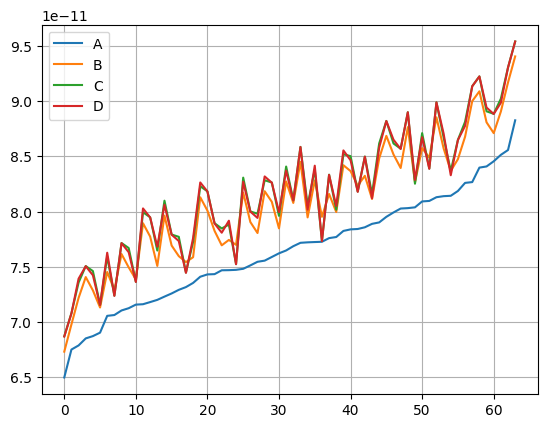

In [44]:
plt.figure()
plt.plot(np.arange(0, 64), a_table['timing'], label='A')
plt.plot(np.arange(0, 64), [max_b_propagations[i] for i in a_table['ranking']], label='B')
plt.plot(np.arange(0, 64), [max_c_propagations[i] for i in a_table['ranking']], label='C')
plt.plot(np.arange(0, 64), [max_d_propagations[i] for i in a_table['ranking']], label='D')
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()